In [4]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [8]:
Pkg.add("Measures")

   Resolving package versions...


    Updating `~/Documents/repos/nanoOpt.jl/Project.toml`
  [442fdcdd] + Measures v0.3.2
  No Changes to `~/Documents/repos/nanoOpt.jl/Manifest.toml`


In [9]:
using LazyGrids,Interpolations,DataFrames,CSV,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [10]:
include("../../src/NanoOpt.jl")

zsqrt (generic function with 1 method)

# Gold substrate

In [11]:
mat1 =  material(epstable("gold"),1.0)
mat2  =material(1.0,1.0)

layer = layerstructure([mat1,mat2],[0.0,],"down")

λ = 600.0
k₀ = 2π/λ

#z₀ = λ/2.
z₀ = 900.

px = [1.0,0.0,0.0]
pz = [0.0,0.0,1.0];

In [12]:
z₀

900.0

In [13]:
θ = -0.5π*collect(LinRange(-1,1,501))
ϕ = 0.0*θ;

In [14]:
f1(p::Vector{Float64}) = p[1].*sin.(ϕ) .- p[2].*cos.(ϕ) 
f2(p::Vector{Float64}) = p[1].*cos.(ϕ).*cos.(θ) .+ p[2].*sin.(ϕ).*cos.(θ) .- p[3].*sin.(θ)

f2 (generic function with 1 method)

In [15]:
px1,px2 = f1(px),f2(px)
pz1,pz2 = f1(pz),f2(pz);

In [16]:
k₂ = mat2.k(k₀)
kpar = abs.(k₂.*sin.(θ))

refld = rtcoeffs(layer,k₀,kpar,"down")
refl = refld.r;

In [17]:
Px1 = (1.0 .+ exp(2im*k₂*z₀).*refl.TE).*px1
Px2 = (1.0 .+ exp(2im*k₂*z₀).*refl.TM).*px2
Pz1 = (1.0 .+ exp(2im*k₂*z₀).*refl.TE).*pz1
Pz2 = (1.0 .+ exp(2im*k₂*z₀).*refl.TM).*pz2

sx = abs.(Px1).^2 + abs.(Px2).^2
sz = abs.(Pz1).^2 + abs.(Pz2).^2;

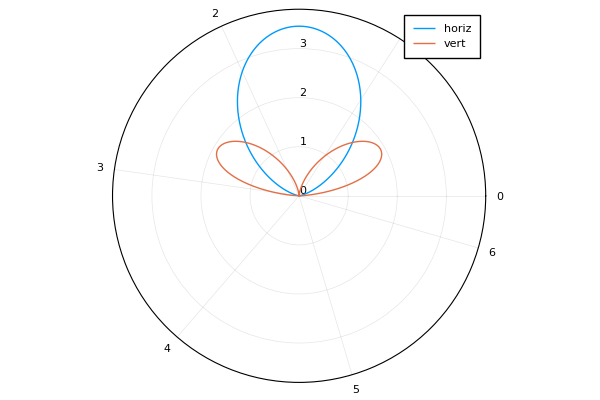

In [18]:
plot(0.5π  .- θ,sx,proj=:polar, label="horiz")
plot!( 0.5π  .- θ,sz,proj=:polar, label="vert")

# Glass substrate

In [19]:
mat1 =  material(1.5^2,1.0)
mat2  =material(1.0,1.0)

layer = layerstructure([mat1,mat2],[0.0,],"down")

λ = 600.0
k₀ = 2π/λ

z₀ = λ/2.
#z₀ = 10.

px = [1.0,0.0,0.0]
pz = [0.0,0.0,1.0];

In [20]:
px1,px2 = f1(px),f2(px)
pz1,pz2 = f1(pz),f2(pz);

In [21]:
k₂ = mat2.k(k₀)
kpar = abs.(k₂.*sin.(θ))

refld = rtcoeffs(layer,k₀,kpar,"down")
refl = refld.r;

Px1 = (1.0 .+ exp(2im*k₂*z₀).*refl.TE).*px1
Px2 = (1.0 .+ exp(2im*k₂*z₀).*refl.TM).*px2
Pz1 = (1.0 .+ exp(2im*k₂*z₀).*refl.TE).*pz1
Pz2 = (1.0 .+ exp(2im*k₂*z₀).*refl.TM).*pz2

sxᵤ = abs.(Px1).^2 + abs.(Px2).^2
szᵤ = abs.(Pz1).^2 + abs.(Pz2).^2;

In [22]:
k₂ = mat1.k(k₀)
kpar = abs.(k₂.*sin.(θ))

refld = rtcoeffs(layer,k₀,kpar,"down")
refl = refld.r;

Px1 = (1.0 .+ exp(2im*k₂*z₀).*refl.TE).*px1
Px2 = (1.0 .+ exp(2im*k₂*z₀).*refl.TM).*px2
Pz1 = (1.0 .+ exp(2im*k₂*z₀).*refl.TE).*pz1
Pz2 = (1.0 .+ exp(2im*k₂*z₀).*refl.TM).*pz2

sxᵢ = abs.(Px1).^2 + abs.(Px2).^2
szᵢ = abs.(Pz1).^2 + abs.(Pz2).^2;

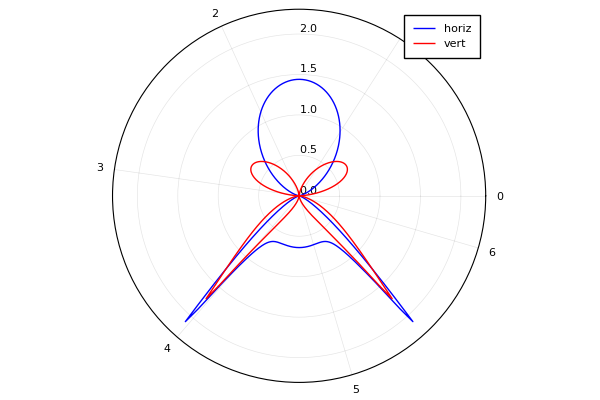

In [23]:
plot(0.5π  .- θ,sxᵤ,c=:blue,proj=:polar, label="horiz")
plot!(-0.5π  .+ θ,sxᵢ,c=:blue,proj=:polar, label="")
plot!( 0.5π  .- θ,szᵤ,c=:red,proj=:polar, label="vert")
plot!(-0.5π  .+ θ,szᵢ,c=:red,proj=:polar, label="")